In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  
pd.set_option('display.max_columns', 50) 

students = pd.read_csv('stud_math.xls')

In [4]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Анализ возраста учеников

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

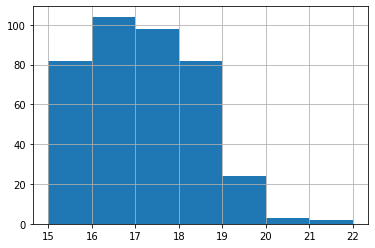

In [5]:
students['age'].hist(bins = 7)
students['age'].value_counts()

Предположим, что учеников старше 20 лет не стоит учитывать  

Проверим

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


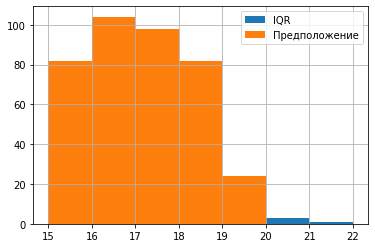

In [6]:
median = students['age'].median()
IQR = students['age'].quantile(0.75) - students['age'].quantile(0.25)
perc25 = students['age'].quantile(0.25)
perc75 = students['age'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['age'].loc[students['age'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 7, range = (15, 22), label = 'IQR')
students['age'].loc[students['age'] < 20].hist(bins = 7, range = (15, 22), label = 'Предположение')
plt.legend();

In [7]:
students = students.loc[students['age'] < 20]

## Образование матери

4.0    130
2.0    101
3.0     95
1.0     58
0.0      3
Name: Medu, dtype: int64

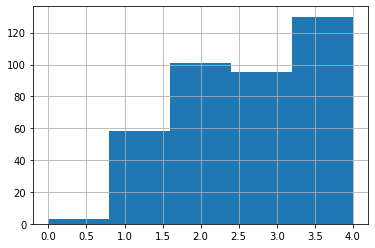

In [8]:
students['Medu'].hist(bins = 5, range = (0, 4))
students['Medu'].value_counts()

Предлагается убрать матерей без образования

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


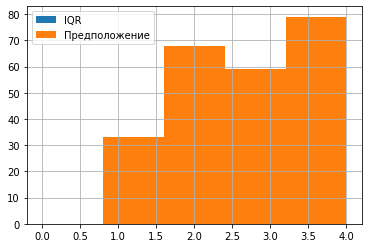

In [58]:
median = students['Medu'].median()
IQR = students['Medu'].quantile(0.75) - students['Medu'].quantile(0.25)
perc25 = students['Medu'].quantile(0.25)
perc75 = students['Medu'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['Medu'].loc[students['Medu'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
students['Medu'].loc[students['Medu'] > 0].hist(bins = 5, range = (0, 4), label = 'Предположение')
plt.legend();

In [10]:
students = students.loc[students['Medu'] > 0]

## Образование отца

2.0     100
3.0      95
4.0      88
1.0      74
0.0       2
40.0      1
Name: Fedu, dtype: int64

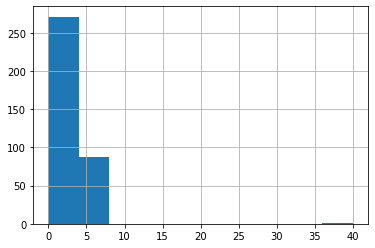

In [11]:
students['Fedu'].hist()
students['Fedu'].value_counts()

In [12]:
students = students.loc[(students['Fedu'] < 40) & (students['Fedu'] > 0)]

2.0    100
3.0     95
4.0     88
1.0     74
Name: Fedu, dtype: int64

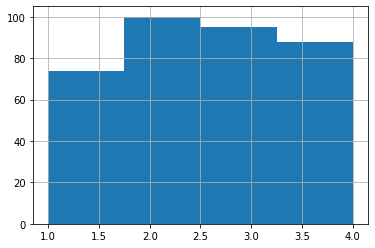

In [13]:
students['Fedu'].hist(bins = 4, range = (1, 4))
students['Fedu'].value_counts()

## Время пути до школы

1.0    216
2.0     88
3.0     21
4.0      7
Name: traveltime, dtype: int64

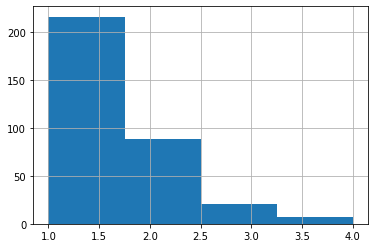

In [14]:
students['traveltime'].hist(bins = 4, range = (1, 4))
students['traveltime'].value_counts()

Определим данные, которые следует исключить из выборки

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


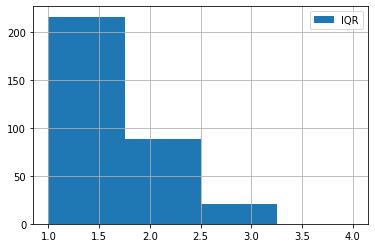

In [15]:
median = students['traveltime'].median()
IQR = students['traveltime'].quantile(0.75) - students['traveltime'].quantile(0.25)
perc25 = students['traveltime'].quantile(0.25)
perc75 = students['traveltime'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['traveltime'].loc[students['traveltime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 4, range = (1, 4), label = 'IQR')
plt.legend();

Отсеиваются данные людей, время пути до школы которых составляет более 60 минут.

In [16]:
students = students.loc[students['traveltime'] < 4]

## Время в пути до школы

2.0    162
1.0     84
3.0     51
4.0     22
Name: studytime, dtype: int64

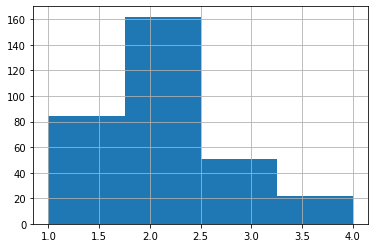

In [17]:
students['studytime'].hist(bins = 4, range = (1, 4))
students['studytime'].value_counts()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


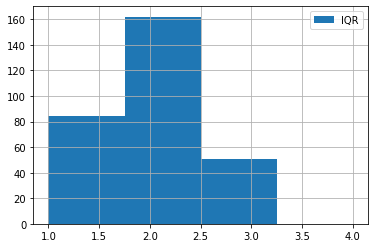

In [18]:
median = students['studytime'].median()
IQR = students['studytime'].quantile(0.75) - students['studytime'].quantile(0.25)
perc25 = students['studytime'].quantile(0.25)
perc75 = students['studytime'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['studytime'].loc[students['studytime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 4, range = (1, 4), label = 'IQR')
plt.legend();

## Количество внеучебных неудач

0.0    249
1.0     41
2.0     11
3.0      9
Name: failures, dtype: int64

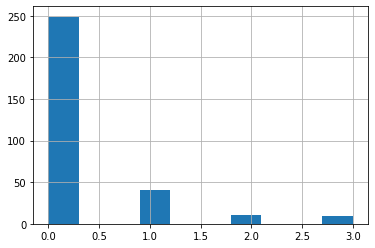

In [19]:
students['failures'].hist()
students['failures'].value_counts()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


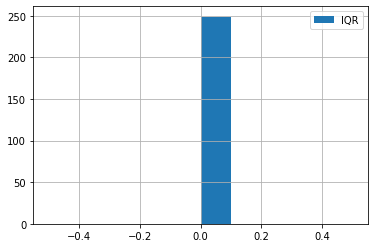

In [20]:
median = students['failures'].median()
IQR = students['failures'].quantile(0.75) - students['failures'].quantile(0.25)
perc25 = students['failures'].quantile(0.25)
perc75 = students['failures'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['failures'].loc[students['failures'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

Так как остаётся единственное значение мы оставим остальные значения тоже.

## Семейные отношения

 4.0    155
 5.0     78
 3.0     49
 2.0     15
 1.0      5
-1.0      1
Name: famrel, dtype: int64

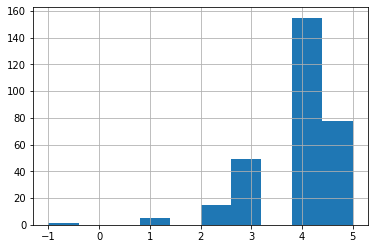

In [21]:
students['famrel'].hist()
students['famrel'].value_counts()

Отсеем некорректные ответы

In [22]:
students = students[students['famrel'] > -1]

4.0    155
5.0     78
3.0     49
2.0     15
1.0      5
Name: famrel, dtype: int64

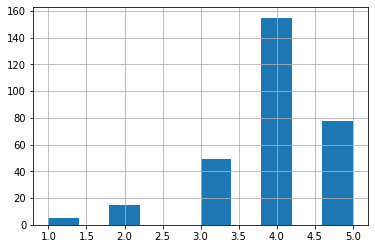

In [23]:
students['famrel'].hist()
students['famrel'].value_counts()

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


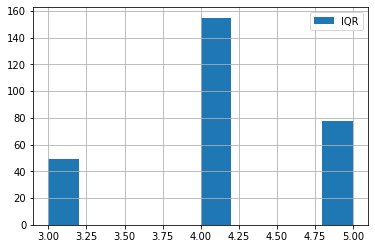

In [24]:
median = students['famrel'].median()
IQR = students['famrel'].quantile(0.75) - students['famrel'].quantile(0.25)
perc25 = students['famrel'].quantile(0.25)
perc75 = students['famrel'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['famrel'].loc[students['famrel'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

In [25]:
students = students[students['famrel'] >= 3]

4.0    155
5.0     78
3.0     49
Name: famrel, dtype: int64

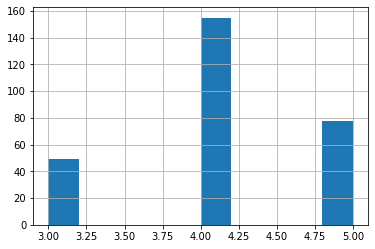

In [26]:
students['famrel'].hist()
students['famrel'].value_counts()

## Свободное время после школы

3.0    110
4.0     78
2.0     46
5.0     26
1.0     13
Name: freetime, dtype: int64

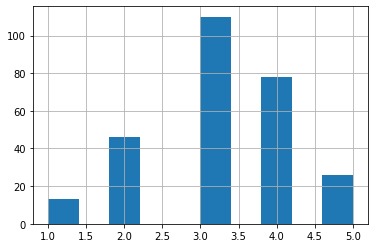

In [27]:
students['freetime'].hist()
students['freetime'].value_counts()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


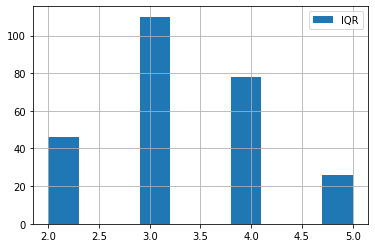

In [28]:
median = students['freetime'].median()
IQR = students['freetime'].quantile(0.75) - students['freetime'].quantile(0.25)
perc25 = students['freetime'].quantile(0.25)
perc75 = students['freetime'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['freetime'].loc[students['freetime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

In [29]:
students = students[students['freetime'] >= 2]

## Проведение времени с друзьями

3.0    91
2.0    59
4.0    59
5.0    33
1.0    13
Name: goout, dtype: int64

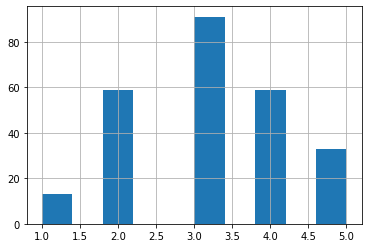

In [30]:
students['goout'].hist()
students['goout'].value_counts()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


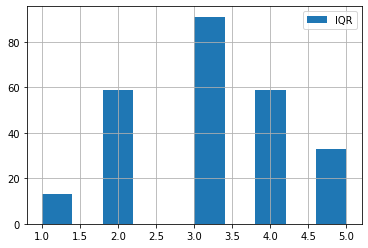

In [31]:
median = students['goout'].median()
IQR = students['goout'].quantile(0.75) - students['goout'].quantile(0.25)
perc25 = students['goout'].quantile(0.25)
perc75 = students['goout'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['goout'].loc[students['goout'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

**Выбросы отсутствуют**

## Текущее состояние здоровья

5.0    84
3.0    63
4.0    43
2.0    31
1.0    29
Name: health, dtype: int64

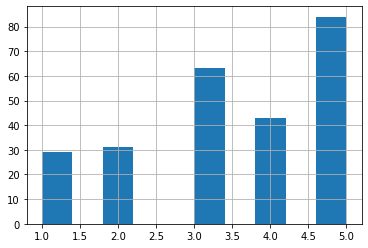

In [32]:
students['health'].hist()
students['health'].value_counts()

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


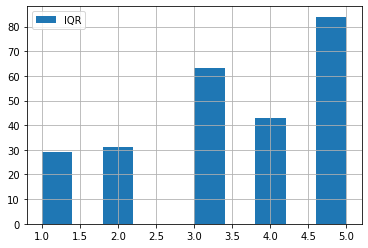

In [33]:
median = students['health'].median()
IQR = students['health'].quantile(0.75) - students['health'].quantile(0.25)
perc25 = students['health'].quantile(0.25)
perc75 = students['health'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['health'].loc[students['health'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

**Выбросы отсутствуют**

## Количество пропущенных занятий

0.0     72
2.0     41
4.0     40
6.0     19
8.0     14
10.0    11
12.0     9
16.0     6
3.0      6
14.0     4
7.0      3
22.0     3
18.0     2
5.0      2
20.0     2
1.0      2
9.0      2
17.0     1
56.0     1
28.0     1
26.0     1
13.0     1
15.0     1
25.0     1
38.0     1
23.0     1
11.0     1
24.0     1
Name: absences, dtype: int64

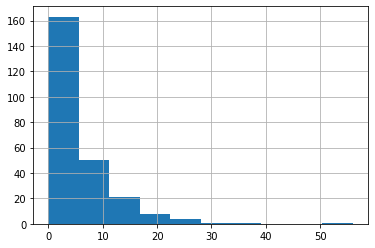

In [34]:
students['absences'].hist()
students['absences'].value_counts()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


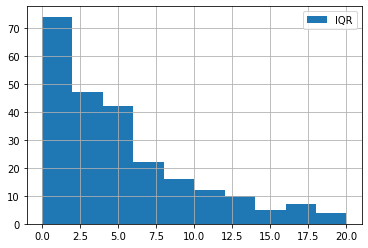

In [35]:
median = students['absences'].median()
IQR = students['absences'].quantile(0.75) - students['absences'].quantile(0.25)
perc25 = students['absences'].quantile(0.25)
perc75 = students['absences'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['absences'].loc[students['absences'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')
plt.legend();

In [36]:
students = students[students['absences'] <= 20]

# Оценка номинативных данных

In [37]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               239 non-null    object 
 1   sex                  239 non-null    object 
 2   age                  239 non-null    int64  
 3   address              232 non-null    object 
 4   famsize              224 non-null    object 
 5   Pstatus              215 non-null    object 
 6   Medu                 239 non-null    float64
 7   Fedu                 239 non-null    float64
 8   Mjob                 229 non-null    object 
 9   Fjob                 218 non-null    object 
 10  reason               228 non-null    object 
 11  guardian             218 non-null    object 
 12  traveltime           239 non-null    float64
 13  studytime            236 non-null    float64
 14  failures             226 non-null    float64
 15  schoolsup            234 non-null    obj

## Абревиатура школы

In [38]:
students['school'].unique()
students['school'].value_counts()
students['school'].unique()

array(['GP', 'MS'], dtype=object)

## Пол ученика

In [39]:
students['sex'].unique()

array(['F', 'M'], dtype=object)

## Тип адреса ученика

In [40]:
students['address'].unique()

array(['U', nan, 'R'], dtype=object)

## Размер семьи

In [41]:
students['famsize'].unique()

array([nan, 'GT3', 'LE3'], dtype=object)

## Cтатус совместного жилья родителей

In [42]:
students['Pstatus'].unique()

array(['A', nan, 'T'], dtype=object)

## Работа матери

In [43]:
students['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

## Работа отца

In [44]:
students['Fjob'].unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

## Причина выбора школы

In [45]:
students['reason'].unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

## Опекун

In [46]:
students['guardian'].unique()

array(['mother', 'father', 'other', nan], dtype=object)

## Дополнительная образовательная поддержка

In [47]:
students['schoolsup'].unique()

array(['yes', 'no', nan], dtype=object)

## Cемейная образовательная поддержка

In [48]:
students['famsup'].unique()

array(['no', 'yes', nan], dtype=object)

## Дополнительные платные занятия по математике

In [49]:
students['paid'].unique()

array(['no', nan, 'yes'], dtype=object)

## Дополнительные внеучебные занятия

In [50]:
students['activities'].unique()

array(['no', 'yes', nan], dtype=object)

## Посещал детский сад

In [51]:
students['nursery'].unique()

array(['yes', 'no', nan], dtype=object)

## Хочет получить высшее образование

In [52]:
students['higher'].unique()

array(['yes', nan, 'no'], dtype=object)

## Наличие интернета дома

In [53]:
students['internet'].unique()

array([nan, 'yes', 'no'], dtype=object)

## В романтических отношениях

In [54]:
students['romantic'].unique()

array(['no', nan, 'yes'], dtype=object)

# Корреляционный анализ

In [55]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.217586,-0.189050,0.134081,0.061280,0.109871,-0.061280,-0.028729,-0.056841,0.098735,-0.030568,0.097648,-0.233557
Medu,-0.217586,1.000000,0.657373,-0.148440,0.070195,-0.218653,-0.070195,0.057523,-0.018662,0.011729,-0.014333,0.112557,0.234598
Fedu,-0.189050,0.657373,1.000000,-0.103692,-0.009111,-0.218373,0.009111,-0.019996,-0.052110,-0.006011,0.022096,0.030862,0.141384
traveltime,0.134081,-0.148440,-0.103692,1.000000,-0.184608,0.063378,0.184608,-0.035469,-0.017965,-0.085156,-0.019624,-0.086520,-0.065993
studytime,0.061280,0.070195,-0.009111,-0.184608,1.000000,-0.127355,-1.000000,0.115793,-0.100544,0.002005,-0.026785,-0.069404,0.126263
failures,0.109871,-0.218653,-0.218373,0.063378,-0.127355,1.000000,0.127355,-0.012053,0.118028,0.027689,0.121086,0.067049,-0.392228
"studytime, granular",-0.061280,-0.070195,0.009111,0.184608,-1.000000,0.127355,1.000000,-0.115793,0.100544,-0.002005,0.026785,0.069404,-0.126263
famrel,-0.028729,0.057523,-0.019996,-0.035469,0.115793,-0.012053,-0.115793,1.000000,0.113134,0.022723,0.022529,0.023686,0.097213
freetime,-0.056841,-0.018662,-0.052110,-0.017965,-0.100544,0.118028,0.100544,0.113134,1.000000,0.259556,0.065066,0.097223,0.023217
goout,0.098735,0.011729,-0.006011,-0.085156,0.002005,0.027689,-0.002005,0.022723,0.259556,1.000000,0.032882,0.055412,-0.147093


- С возрастом людям сложнее сосредоточится на учёбе.
- Образование родителей служит примером для детей (влияние матери больше влияния отца).
- Если ребёнок уделяет больше дополнительного времени на учёбу, это положительно сказывается на его результатах.
- Отсутствие внеучебных неудач положительно влияет на успеваемость ребёнка.
- Проведение времени с друзьями отрицательным образом влияет на оценки.
- **Большое количество пропущенных занятий, положительно влияет на результаты !!!.**
- Время пути до школы, семейные отношения, свободное время после школы, и текущее состояние здоровья слабо влияют на успеваемость.

## Категориальные признаки

In [56]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.boxplot(x=column, y='score', 
                data=students,
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

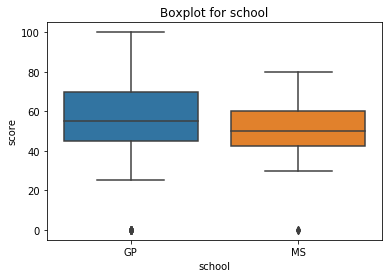

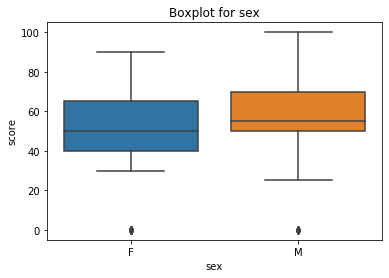

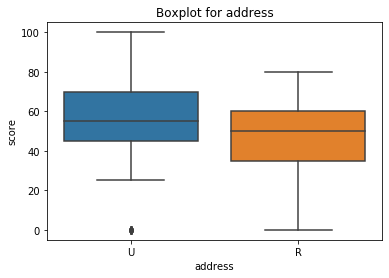

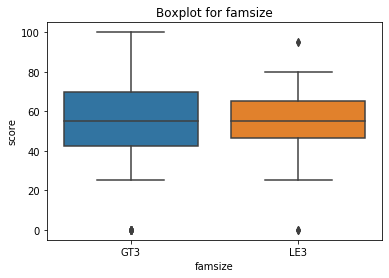

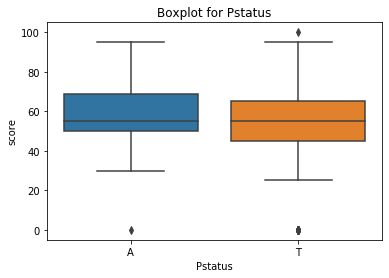

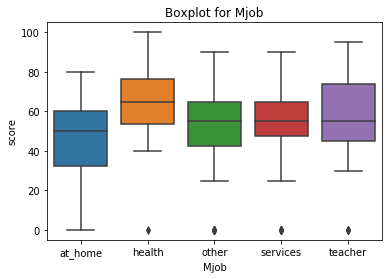

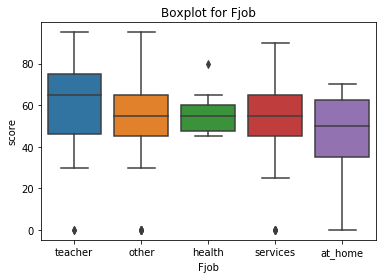

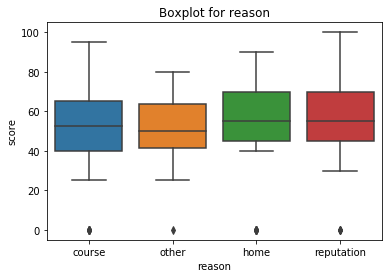

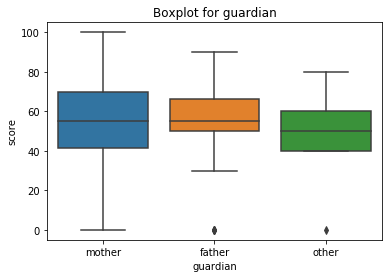

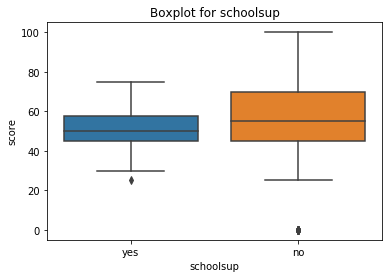

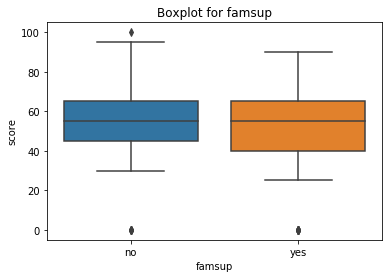

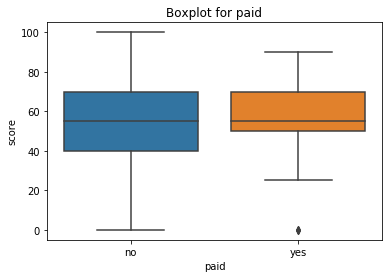

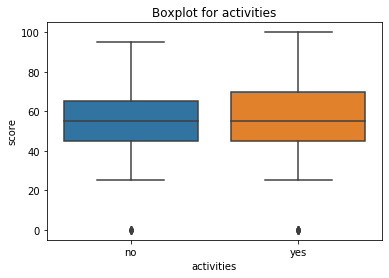

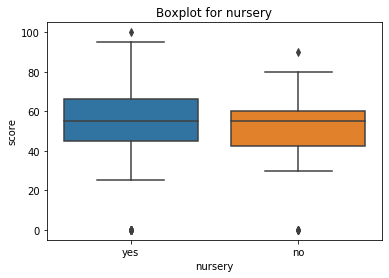

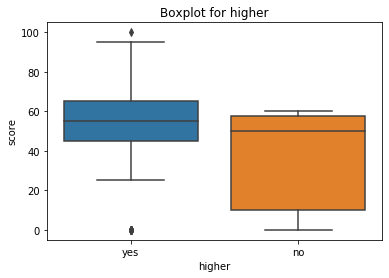

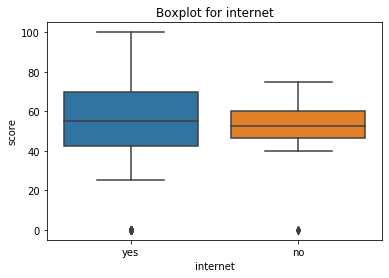

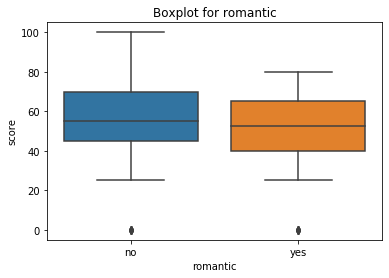

In [57]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

- В школе GP результаты выше, чем в школе MP
- Мальчики справляются с математикой лучше девочек
- У городских жителей лучше результаты по сравнению с теми, кто живёт за городом
- В семьях учителей результаты выше
- Дополнительная поддержка повышает результаты
- Посещение детского сада улучшает результаты